### Kalman Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("numpy version:[%s]."%(np.__version__))

numpy version:[1.22.4].


### Define `KalmanFilter`
- dt is the time step.
- $F$ is the state transition matrix that defines how the state evolves from one time step to the next without considering the control inputs.
- $H$ is the observation matrix that maps the true state space into the observed space.
- $Q$ is the process noise covariance which represents the uncertainty in the model.
- $R$ is the measurement noise covariance which represents the uncertainty in sensor measurements.
- $P$ is the state covariance matrix which represents the uncertainty in the state estimate.
- $x$ is the state vector.

In [6]:
class KalmanFilter:
    def __init__(self, dt, q=1.0, r=1.0):
        # Time step
        self.dt = dt
        
        # State Transition Matrix
        self.F = np.array([[1, 0, dt, 0],
                           [0, 1, 0, dt],
                           [0, 0, 1, 0],
                           [0, 0, 0, 1]])

        # Measurement Matrix
        self.H = np.array([[1, 0, 0, 0],
                           [0, 1, 0, 0]])

        # Initial State Covariance
        self.P = np.eye(4)

        # Process Noise Covariance
        self.Q = q*np.eye(4)

        # Measurement Noise Covariance
        self.R = r*np.eye(2)

        # Initial State
        self.x = np.zeros((4, 1))

    def predict(self):
        # Predict the state
        self.x = self.F @ self.x 

        # Predict the state covariance
        self.P = self.F @ self.P @ self.F.T + self.Q

    def update(self, z):
        # Compute Kalman Gain
        S = self.H @ self.P @ self.H.T + self.R 
        K = self.P @ self.H.T @ np.linalg.inv(S)
        
        # Update the state
        self.x = self.x + K @ (z - self.H @ self.x)

        # Update the state covariance
        self.P = self.P - K @ self.H @ self.P

print ("Ready.")

Ready.


### Run

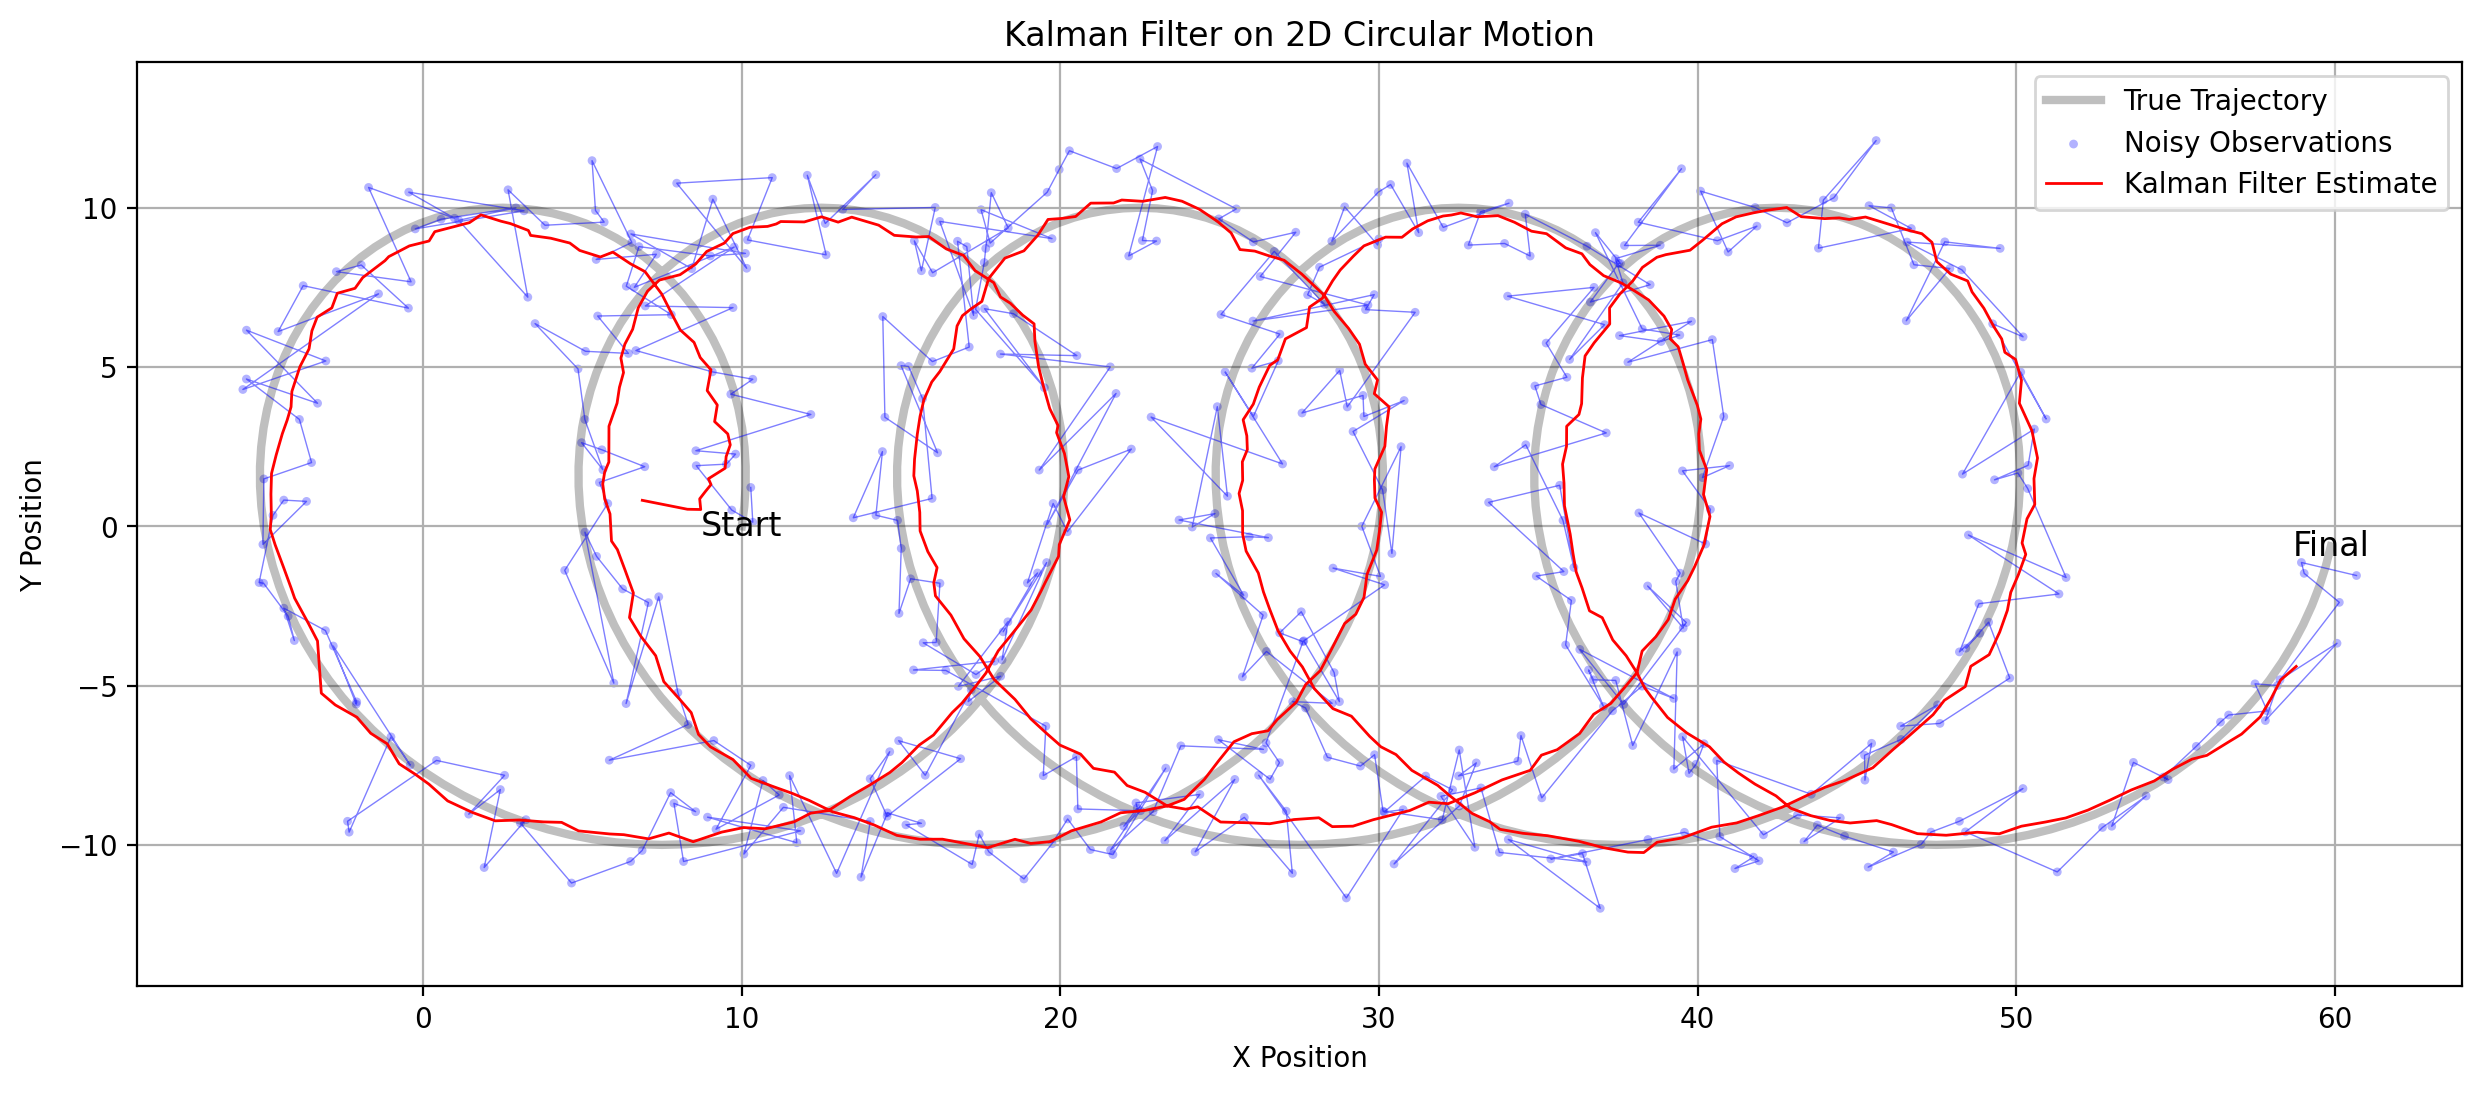

In [58]:
# Constants
dt        = 0.01 # time step
q         = 0.01 # expected process noise
r         = 0.5 # expected measurement noise
num_steps = 500 # number of observations
radius    = 10 # radius of the circle
ang_vel   = 2*np.pi
dir_vel   = 10

# Generate circular motion trajectory
true_x = []
true_y = []
for tick in range(num_steps):
    t = tick*dt
    x = radius*np.cos(ang_vel*t) + dir_vel*t
    y = radius*np.sin(ang_vel*t)
    true_x.append(x)
    true_y.append(y)
true_x = np.array(true_x)
true_y = np.array(true_y)

# Add Gaussian noise to observations
std_obs = 1.0
observed_x = true_x + np.random.normal(0, std_obs, num_steps)  
observed_y = true_y + np.random.normal(0, std_obs, num_steps)

# Apply Kalman Filter
kf = KalmanFilter(dt=dt,q=q,r=r)
estimated_states = []
estimated_variances = []
for i in range(num_steps):
    kf.predict()
    kf.update(np.array([[observed_x[i]], [observed_y[i]]]))
    estimated_states.append(kf.x.copy())
    estimated_variances.append(kf.P[0,0]+kf.P[1,1])
estimated_states = np.array(estimated_states).squeeze()
estimated_variances = np.array(estimated_variances).squeeze()

# Plotting
plt.figure(figsize=(15,6))
plt.text(true_x[0],true_y[0],'Start', va='center', ha='center', fontsize=12)
plt.text(true_x[-1],true_y[-1],'Final', va='center', ha='center', fontsize=12)
plt.plot(
    true_x, true_y, '-', color='k', lw=3, alpha=0.25, 
    label="True Trajectory")
plt.plot(
    observed_x, observed_y, '-', color='b', lw=1/2, alpha=0.5)
plt.scatter(
    observed_x, observed_y, color='b', alpha=0.3, edgecolor='none', s=10,
    label="Noisy Observations")
plt.plot(
    estimated_states[:,0], estimated_states[:,1], '-', color='r', lw=1,
    label="Kalman Filter Estimate")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Kalman Filter on 2D Circular Motion")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()